In [1]:
%pylab inline
from champ.sim import multiXC, multiXCGVF
from scipy.optimize import root_scalar

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
n = 10
x_arr = linspace(0,100,n)
z_arr = linspace(0,1,n)
sim = multiXC(x_arr,z_arr,0.1, init_radii=2.0)

In [28]:
h0 = sim.z_arr[0] + 0.5
hguess = h0+0.1
g=9.8
f=0.1
L = sim.x_arr[1] - sim.x_arr[0]
fd_down = h0 - sim.z_arr[0]
fd_guess = 0.40084796343254675# WSnew #hguess - sim.z_arr[1]
xc_up = sim.xcs[1]
xc_down = sim.xcs[0]



A_guess = xc_up.calcA(depth=fd_guess)
Pw_guess = xc_up.calcP(depth=fd_guess)
K_guess = A_guess * np.sqrt(2*g*(4*A_guess/Pw_guess)/f)
S_f_guess = sim.Q_w**2 / K_guess
h_e_guess = S_f_guess * L


A_down = xc_down.calcA(depth=fd_down)
Pw_down = xc_down.calcP(depth=fd_down)


V_down = sim.Q_w/A_down
V_up_guess = sim.Q_w/A_guess

V_head_down = V_down**2/(2*g)
V_head_up_guess = V_up_guess**2/(2*g)

fd_calc_from_guess = sim.z_arr[0] - sim.z_arr[1] + fd_down + V_head_down - V_head_up_guess + h_e_guess
fd_calc_from_guess

0.40084796343254675

In [20]:
WSnew = fd_guess + 0.7 * (fd_calc_from_guess - fd_guess)
WSnew

0.4248353727310991

-1.399990209518333

In [31]:
def fd_res(fd_guess):
    A_guess = xc_up.calcA(depth=fd_guess)
    Pw_guess = xc_up.calcP(depth=fd_guess)
    K_guess = A_guess * np.sqrt(2*g*(4*A_guess/Pw_guess)/f)
    # S_f_guess = sim.Q_w**2 / K_guess


    A_down = xc_down.calcA(depth=fd_down)
    Pw_down = xc_down.calcP(depth=fd_down)
    K_down = A_down * np.sqrt(2*g*(4*A_down/Pw_down)/f)

    S_f_guess = (2 * sim.Q_w / (K_down + K_guess) )**2
    h_e_guess = S_f_guess * L

    V_down = sim.Q_w/A_down
    V_up_guess = sim.Q_w/A_guess

    V_head_down = V_down**2/(2*g)
    V_head_up_guess = V_up_guess**2/(2*g)

    fd_calc_from_guess = sim.z_arr[0] - sim.z_arr[1] + fd_down + V_head_down - V_head_up_guess + h_e_guess
    return fd_guess - fd_calc_from_guess

In [34]:
sol = root_scalar(fd_res, x0=0.4, x1=0.45)

In [35]:
sol.root

0.3890728672941937

In [1]:
%pylab inline
from champ.sim import multiXC, multiXCGVF
from scipy.optimize import root_scalar
n = 100
x_arr = linspace(0,1000,n)
z_arr = linspace(0,1,n)
sim = multiXCGVF(x_arr,z_arr,0.1, init_radii=5.0)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
sim.calc_flow()

iterations = 1   fd_guess = 0.14525513108079122
err = 0.02313302462554037
iterations = 2   fd_guess = 0.16144824831866947
err = 0.0044326602872823695
iterations = 3   fd_guess = 0.16528660068492806
err = -0.0001931047950081144
iterations = 1   fd_guess = 0.16528660068492806
err = 0.007803673799520627
iterations = 2   fd_guess = 0.1707491723445925
err = 0.0017604036094206743
iterations = 3   fd_guess = 0.17162937414930285
err = 0.0008802018047103233
iterations = 1   fd_guess = 0.17162937414930285
err = 0.0046212199526563524
iterations = 2   fd_guess = 0.17486422811616228
err = 0.0013863659857969168
iterations = 3   fd_guess = 0.17555741110906076
err = 0.0006931829928984445
iterations = 1   fd_guess = 0.17555741110906076
err = 0.004621219952656519
iterations = 2   fd_guess = 0.17879226507592033
err = 0.0009597098465162213
iterations = 1   fd_guess = 0.17879226507592033
err = 0.0020628513017909023
iterations = 2   fd_guess = 0.18023626098717396
err = 0.0006188553905372707
iterations = 1  

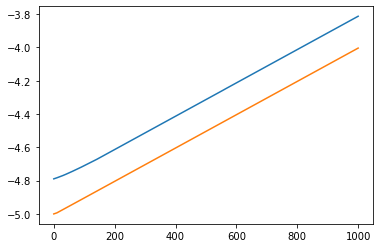

In [12]:
plot(sim.x_arr, sim.h)
plot(sim.x_arr, sim.z_arr)

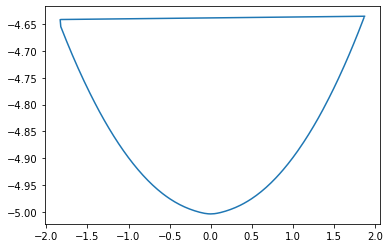

In [11]:
plot(sim.xcs[1].x, sim.xcs[1].y)

In [9]:
for i in arange(1000):
    sim.run_one_step()

iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818046793869e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818046793869e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818048570226e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818048570226e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818046793869e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818047682047e-06
iterations = 1   fd_guess = 0.18781381679774528
err = -4.699818048570226e-06

KeyboardInterrupt: 

In [27]:

sim.xcs[0].Q

0.1

In [16]:
len(sim.z_arr)

100

In [28]:
sim.Q_w

0.1

In [2]:
from champ.runSim import runSim

In [12]:
sim_params = {'Q_w':1, 'dt_erode':1, 'adaptive_step':True, 'max_frac_erode':0.0005, 'xc_n':300,
    'trim':True, 'a':1, 'K':[2e-5, 0.5e-5, 2e-5], 'layer_elevs': [-10,-3]}
sim = runSim(n=100, L=1000, dz=15, r_init=2, endtime=10000, plotdir='./test', dz0_dt=0.0001, flow_solver='GVF',
    sim_params=sim_params)

Reducing timestep to 0.6666666666666666
timestep= 1    time= 1.0
Reducing timestep to 0.4444444444444444
timestep= 2    time= 1.6666666666666665
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
####################################

ZeroDivisionError: float division by zero

In [58]:
import pickle
simGVF = pickle.load(open('/home/mcoving/ChampOutputs/gvf-flow-tests/test-gvp-flow-figs/snapshot-00098000.pkl', 'rb'))
simOrig = pickle.load(open('/home/mcoving/ChampOutputs/resolution-tests/test-spim-equiv-run-figs/snapshot-00113000.pkl', 'rb'))

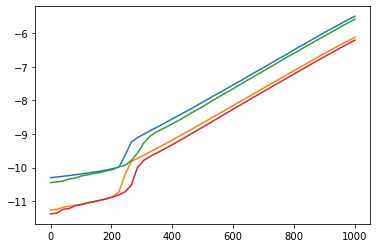

In [59]:
plot(simGVF.x_arr, simGVF.h)
plot(simGVF.x_arr, simGVF.z_arr)
plot(simOrig.x_arr, simOrig.h)
plot(simOrig.x_arr, simOrig.z_arr)

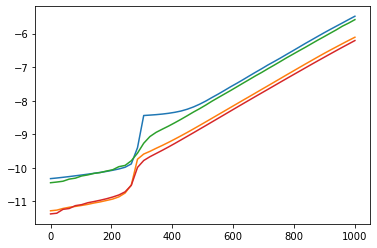

In [47]:
plot(simGVF.x_arr, simGVF.h)
plot(simGVF.x_arr, simGVF.z_arr)
plot(simOrig.x_arr, simOrig.h)
plot(simOrig.x_arr, simOrig.z_arr)

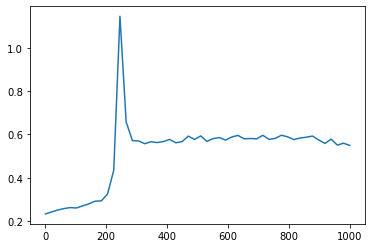

In [60]:
Fr = simGVF.Q_w * np.sqrt(1./(9.8*(simGVF.A_w**3/simGVF.W)))
plot(simGVF.x_arr, Fr)

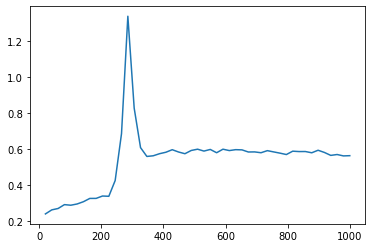

In [49]:
Fr = simOrig.Q_w * np.sqrt(1./(9.8*(simOrig.A_w**3/simOrig.W)))
plot(simOrig.x_arr[1:], Fr)

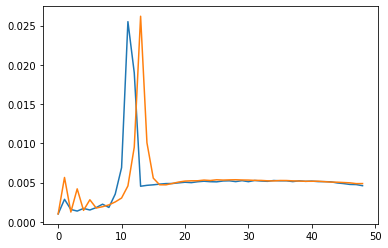

In [61]:
plot(simGVF.slopes)
plot(simOrig.slopes)

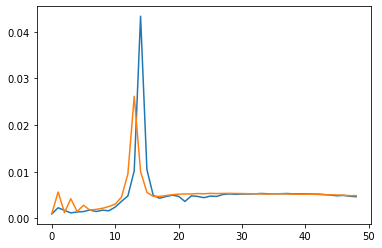

In [56]:
plot(simGVF.slopes)
plot(simOrig.slopes)

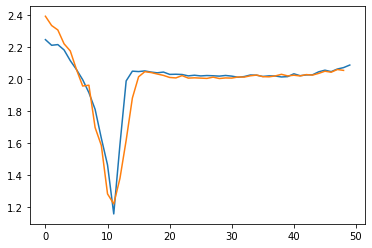

In [62]:
plot(simGVF.W)
plot(simOrig.W)

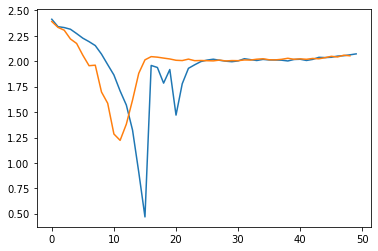

In [55]:
plot(simGVF.W)
plot(simOrig.W)

In [54]:
for i in arange(3,10000):
    print(i)
    simGVF.run_one_step()
    simGVF.z_arr[0] -= 0.0001 * simGVF.dt_erode

3
4
Warning! Reached max iterations in flow solver. Current error is 0.008567250295347384
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
5
Warning! Reached max iterations in flow solver. Current error is -0.009961731881901414
6
Warning! Reached max iterations in flow solver. Current error is 0.001184094957693782
7
8
Warning! Reached max iterations in flow solver. Current error is -0.0036210547716400976
9
Warning! Reached max iterations in flow solver. Current error is 0.02954402804461509
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
########################################
########################################
############ Switch! #############
##########

IndexError: index 0 is out of bounds for axis 0 with size 0